COVID - 19 Classifier

Dictionary : {'ALLERGY': 0, 'COLD': 1, 'COVID': 2, 'FLU': 3}
[[3241   82    2   13]
 [  81   72    6   52]
 [   3    5   45  357]
 [  22   67  345 4498]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3338
           1       0.32      0.34      0.33       211
           2       0.11      0.11      0.11       410
           3       0.91      0.91      0.91      4932

    accuracy                           0.88      8891
   macro avg       0.58      0.58      0.58      8891
weighted avg       0.88      0.88      0.88      8891



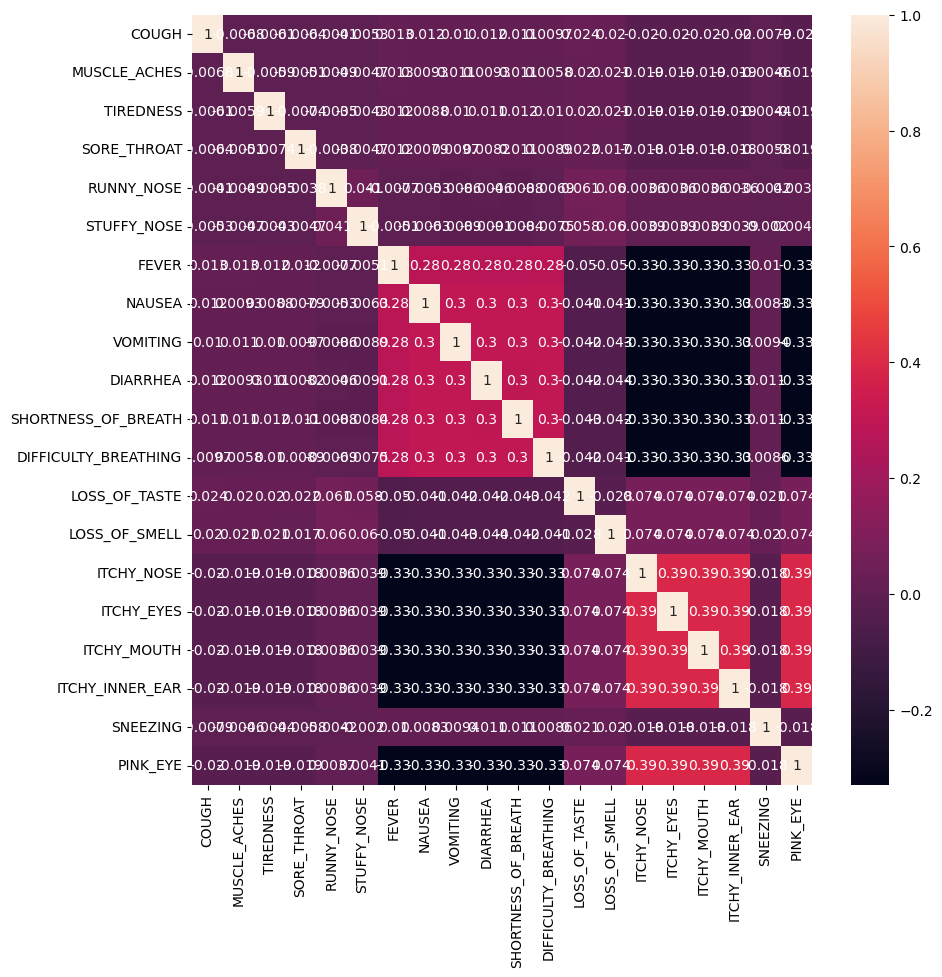

In [4]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import sklearn.metrics
import joblib
import matplotlib.pyplot as plt

# read the CSV file
features = pd.read_csv('/Users/kshitijhalder/Desktop/ACT/Python/June/large_data.csv')    # 44453 entries                        #reading the file
features = features.rename(columns={'TYPE' : 'class'})  #renaming the result column
colnames=features.columns
  # Label Encoding refers to converting the labels into numeric form so as to convert it 
  # into the machine-readable form. 
  # Machine learning algorithms can then decide in a better way on how those labels must be operated
label_encoder = LabelEncoder()                               
features['class']= label_encoder.fit_transform(features['class']) #performing label encoding in the given column
labels = features.pop('class')  #removing the class column from the features table
keys = label_encoder.classes_  
values = label_encoder.transform(label_encoder.classes_)
dictionary = dict(zip(keys, values)) #storing the converted column entries as (key,value) pairs
print("Dictionary :",dictionary)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20,random_state=5)  #splitting the dataset into train and test set
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
  

# Random Forest Classifier
RFclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42) # 10 decision trees used in this classifier
RFclassifier.fit(X_train, y_train)  #training  
filename = 'rf_model.sav'
joblib.dump(RFclassifier, filename)  #save the model
y_pred = RFclassifier.predict(X_test) #predict on test set
accuracyRF = sklearn.metrics.accuracy_score(y_test, y_pred)
print(sklearn.metrics.confusion_matrix(y_test,y_pred))
print(sklearn.metrics.classification_report(y_test,y_pred))


# Heatmap
import seaborn as sns
corr = features.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()


# Find if someone has COVID-19 or not

In [1]:
# 1. Find the power of a number using a recursive function

def power(base, exp):
    if exp == 0:
        return 1
    else:
        return base * power(base, exp - 1)

base = int(input("Enter the base: "))
exp = int(input("Enter the exponent: "))
print("The result is: ", power(base, exp))

The result is:  27


In [6]:
print(ord('A'))  # Output: 65
print(chr(65))  # Output: 'A'

# 2. If a character in a string is consonant change it to the next character

def change_consonant(s):
    vowels = 'aeiou'
    new_str = ''
    for char in s:
        if char.isalpha() and char.lower() not in vowels:
            new_str += chr(ord(char) + 1)
        else:
            new_str += char
    return new_str

s = input("Enter a string: ")
print("The new string is: ", change_consonant(s))


65
A
The new string is:  ieu oihha
